In [26]:
%matplotlib widget

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# The Diffusion Equation
## 1D discretisation:
- The one-dimensional diffusion equation is: $$\frac{\partial u}{\partial t} = \nu\frac{\partial^2u}{\partial{x^2}}$$
- Using the Forward Difference method for time and the Central Difference for space, we can discretise the equations as so:
- $$\frac{\partial u}{\partial t} = \frac{u_{i}^{n+1}-u^{n}_{i}}{\Delta x}$$
- $$\frac{\partial^2 u}{\partial x^2} = \frac{u^n_{i+1}-2u^n_i+u^n_{i-1}}{\Delta x^2}$$
- Where $\Delta x$ is assumed to be constant for all of space, $n$ is the discretisation in time and $i$ the discretisation in space
- The above equations can be combined to give the algebraic equation for $u^{n+1}_{i}$ as: $$u^{n+1}_{i} = u^n_i + \nu\frac{\Delta t}{\Delta x^2}(u^n_{i+1}-2u^n_{i}+u^n_{i-1})$$
## Initial conditions
- The initial condition of $u(x,t)$ is a Gaussian function: $ae^{\frac{-(x-b)^2}{2c}}$

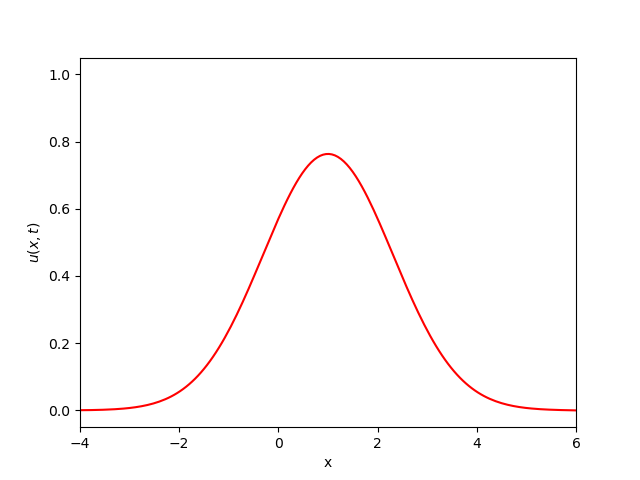

In [66]:
# Animation
nx = 201
nt = 200
dx = 0.0001
nu = 0.3
sigma = 0.5 # For larger time steps
dt = sigma*dx**2/nu # To avoid weird artefacts ie. convergence

gauss = lambda x:np.e**(-(x-1)**2/2)

x = np.linspace(-6,6,nx)
u = gauss(x)

fig, ax = plt.subplots()
artists = []
ax.set(xlim=[-4,6], xlabel='x', ylabel=r'$u(x,t)$')

for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] + nu*(dt/dx**2)*(un[i+1] - 2*un[i] + un[i-1])
    container = ax.plot(x,un, 'r')
    artists.append(container)

ani = animation.ArtistAnimation(fig, artists, interval=400)
ffmpeg_writer = animation.FFMpegWriter(fps=40)
ani.save('diffusion.mp4', writer=ffmpeg_writer)

## Error analysis
- Now we will compare the different Euler methods for differentiation and see how accurate they are
- Analytically, using Taylor expansion we can determine the order of the errors in each method
    - Forward and backward difference methods have inaccuracies of order: $\mathcal{O}(\Delta x)$
    - Whilst central difference has inaccuracies of order: $\mathcal{O}(\Delta x^2)$

In [12]:
def forward_difference(func,diff_func,x0:float,dx:float) -> float:
    """
    Carries out the forward Euler's method for calculating derivatives and returns
    the relative error

    Parameters:
    func: the function from which the estimate of the value will be calculated from [function]
    diff_func: the differentiated function for the calculation of the exact value [function]
    x0: the point where the derivative will be calculated at [float]
    dx: the spacing between the points [float]
    """
    x = func(x0)            # Value of the function at the initial point
    xi = func(x0+dx)        # Value of the function propogated forwards
    dx0 = diff_func(x0)     # Exact value of the differentiated function

    # Forward difference
    ans = (xi-x)/dx
    rel_err = abs((dx0-ans)/dx0)
    return rel_err

def backward_difference(func,diff_func,x0:float,dx:float) -> float:
    """
    Carries out the backward Euler's method for calculating derivatives and returns
    the relative error

    Parameters:
    func: the function from which the estimate of the value will be calculated from [function]
    diff_func: the differentiated function for the calculation of the exact value [function]
    x0: the point where the derivative will be calculated at [float]
    dx: the spacing between the points [float]
    """
    x = func(x0)            # Value of the function at the initial point
    xi = func(x0-dx)        # Value of the function propogated forwards
    dx0 = diff_func(x0)     # Exact value of the differentiated function

    # Forward difference
    ans = (x-xi)/dx
    rel_err = abs((dx0-ans)/dx0)
    return rel_err

def central_difference(func,diff_func,x0:float,dx:float) -> float:
    """
    Carries out the central Euler's method for calculating derivatives and returns
    the relative error

    Parameters:
    func: the function from which the estimate of the value will be calculated from [function]
    diff_func: the differentiated function for the calculation of the exact value [function]
    x0: the point where the derivative will be calculated at [float]
    dx: the spacing between the points [float]
    """
    x = func(x0-dx)         # Value of the function propogated backwards
    xi = func(x0+dx)        # Value of the function propogated forwards
    dx0 = diff_func(x0)     # Exact value of the differentiated function

    # Forward difference
    ans = (xi-x)/(2*dx)
    rel_err = abs((dx0-ans)/dx0)
    return rel_err

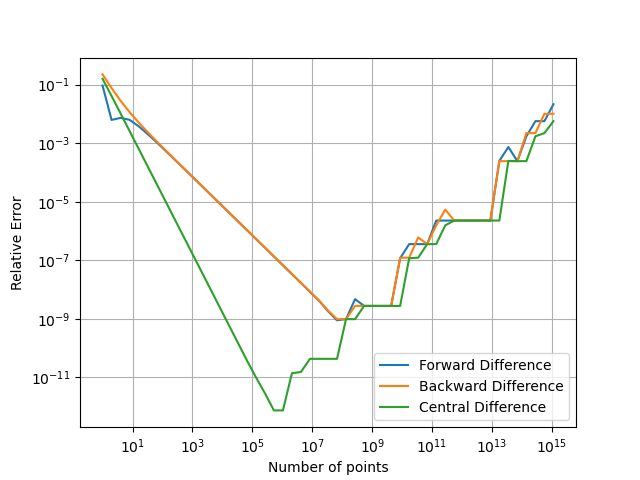

In [63]:
# Exact function
gauss = lambda x: np.sin(x)
diff_gauss = lambda x: np.cos(x)

x0 = 3
N = np.array([2**n for n in range(0,51)])     # values for nx
dN = 1/N
fd_err = np.zeros(dN.size)
bd_err = fd_err.copy()
cd_err = fd_err.copy()

for i in range(dN.size):
    fd_err[i] = forward_difference(gauss,diff_gauss,x0,dN[i])
    bd_err[i] = backward_difference(gauss,diff_gauss,x0,dN[i])
    cd_err[i] = central_difference(gauss,diff_gauss,x0,dN[i])

fig, ax = plt.subplots()
ax.semilogy()
ax.semilogx()
ax.grid()
ax.set_xlabel('Number of points')
ax.set_ylabel('Relative Error')
plt.plot(N,fd_err, label='Forward Difference')
plt.plot(N,bd_err, label='Backward Difference')
plt.plot(N,cd_err, label='Central Difference')
plt.legend()

- These results are in line with our expectation:
    - The central Euler method is clearly the more accurate and efficient numerical method, reaching a smaller relative error in less points (number of points have an inverse relationship with dx, the spacing between points)
    - The highest accuracy achieved was on order $10^{-13}$ for central Euler method compared to forward and backward Euler method's $10^{-10}$
- Why does the relative error start to increase again?
    - This is related to how computers calculate numbers, due to their finite storage capabilities, computers when dividing a number will often experience round-off erros where it loses information due to the truncation of an infinitely precise number
    - This type of error, as evidenced by the graph, becomes more apparent in an operation like division if the denominator becomes too small to a certain point